In [10]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import metrics
import csv
from matplotlib.colors import LinearSegmentedColormap
import scipy.stats
from matplotlib.cm import ScalarMappable


In [11]:
# load mutants for kde plot

dir_filepath = './logs/Aligning_SFT_ESM2s_wpPPO'

# Load mutants from pretrained ESM2 650M
version = 12
esm2_fixed_scores_np = np.load(f'{dir_filepath}/version_{version}/fixed_esm2_t33_650M_UR50D_scores.npy')[:100]

# Load sft mutants
version = 12
esm2_sft_scores_np = np.load(f'{dir_filepath}/version_{version}/sft_esm2_t33_650M_UR50D_scores.npy')[:100]

# Load rl mutants
version = 12
esm2_rl_scores_np = np.load(f'{dir_filepath}/version_{version}/ema_aligned_esm2_t33_650M_UR50D_scores.npy')[:100]

# Load pretrained vae mutants

# Load aligned vae mutants


In [12]:
# Constants for the mean and standard deviation
predicted_log_mean_wt_score = 4.1498 # this is predicted WT score # mean log exp score: 4.094413241


In [13]:
alpha = 0.5

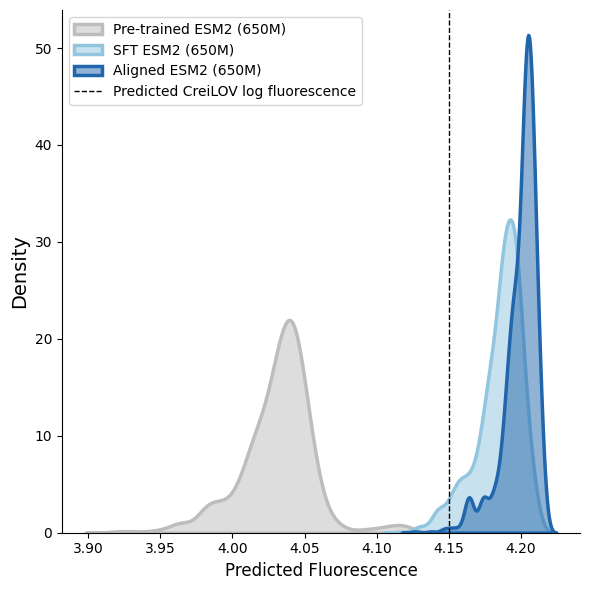

In [14]:
# Plot histogram
fig, ax = plt.subplots(figsize=(6, 6))

# Plot histograms for the models7
sns.kdeplot(np.median(esm2_fixed_scores_np, axis=0), color='#bdbdbd', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='Pre-trained ESM2 (650M)')
sns.kdeplot(np.median(esm2_sft_scores_np, axis=0), color='#92c5de', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='SFT ESM2 (650M)')
sns.kdeplot(np.median(esm2_rl_scores_np, axis=0), color='#2166ac', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='Aligned ESM2 (650M)')

ax.axvline(predicted_log_mean_wt_score, color='black', linestyle='--', linewidth=1, label='Predicted CreiLOV log fluorescence')

ax.set_xlabel('Predicted Fluorescence', fontsize=12)
ax.set_ylabel('Density', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_xlim(3.6, 4.2)
# ax.set_ylim(0, 80)
ax.legend()
plt.tight_layout()

# Save the plot
plt.savefig(f'./figures/ppo_sft_pretrained_esm2_design_scores.svg')
plt.savefig(f'./figures/ppo_sft_pretrained_esm2_design_scores.png')


In [15]:
### Create histogram for vae
df_fixed = pd.read_csv('/Users/nathanielblalock/Desktop/RLXF_Projects/designs/vae_designs/version_507/fixed_vae_designs_scores_507.csv')
vae_fixed_scores_np = df_fixed['Score'][:100]

rl_fixed = pd.read_csv('/Users/nathanielblalock/Desktop/RLXF_Projects/designs/vae_designs/version_507/rl_vae_designs_scores_507.csv')
vae_rl_scores_np = rl_fixed['Score'][:100]

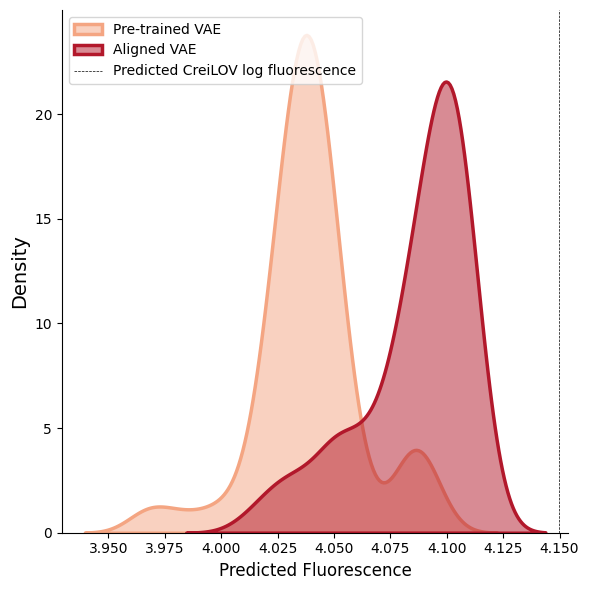

In [16]:
# Plot histogram
fig, ax = plt.subplots(figsize=(6, 6))

# Plot histograms for the models7
sns.kdeplot(vae_fixed_scores_np, color='#f4a582', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='Pre-trained VAE')
sns.kdeplot(vae_rl_scores_np, color='#b2182b', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='Aligned VAE')
ax.axvline(predicted_log_mean_wt_score, color='black', linestyle='--', linewidth=alpha, label='Predicted CreiLOV log fluorescence')
ax.set_xlabel('Predicted Fluorescence', fontsize=12)
ax.set_ylabel('Density', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_xlim(3.9, 4.2)
ax.legend()
plt.tight_layout()

# Save the plot
plt.savefig(f'./figures/ppo_pretrained_vae_design_scores.svg')
plt.savefig(f'./figures/ppo_pretrained_vae_design_scores.png')


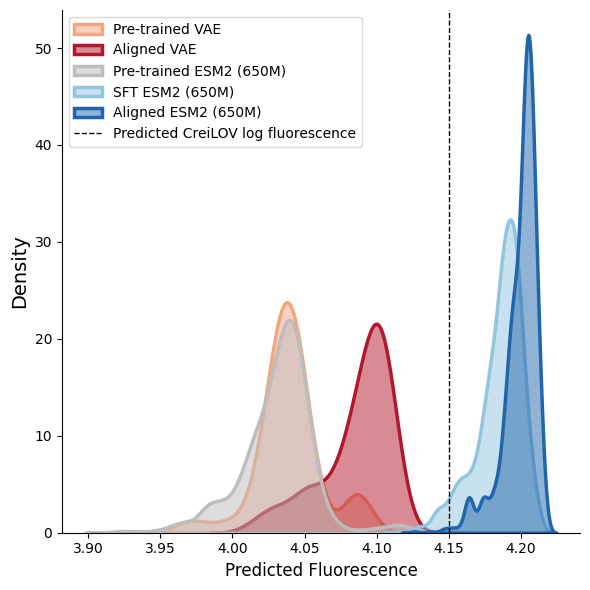

In [17]:
# Plot histogram
fig, ax = plt.subplots(figsize=(6, 6))

# Plot histograms for the models
sns.kdeplot(vae_fixed_scores_np, color='#f4a582', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='Pre-trained VAE')
sns.kdeplot(vae_rl_scores_np, color='#b2182b', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='Aligned VAE')
sns.kdeplot(np.median(esm2_fixed_scores_np, axis=0), color='#bdbdbd', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='Pre-trained ESM2 (650M)')
sns.kdeplot(np.median(esm2_sft_scores_np, axis=0), color='#92c5de', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='SFT ESM2 (650M)')
sns.kdeplot(np.median(esm2_rl_scores_np, axis=0), color='#2166ac', ax=ax, linewidth=2.5, fill=True, alpha=alpha, label='Aligned ESM2 (650M)')

ax.axvline(predicted_log_mean_wt_score, color='black', linestyle='--', linewidth=1, label='Predicted CreiLOV log fluorescence')

ax.set_xlabel('Predicted Fluorescence', fontsize=12)
ax.set_ylabel('Density', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_xlim(3.6, 4.2)
# ax.set_ylim(0, 80)
ax.legend()
plt.tight_layout()

# Save the plot
plt.savefig(f'./figures/ppo_sft_pretrained_esm2_and_vae_design_scores.svg')
plt.savefig(f'./figures/ppo_sft_pretrained_esm2_and_vae_design_scores.png')


In [8]:
# Load the data
file_path = r"RLXF_Designs_121824.csv"
esm2_df = pd.read_csv(file_path)[['Model', 'AA_sequence']]

# Rename Model column values
esm2_df['Model'] = esm2_df['Model'].replace({'Pretrained_ESM2_(650M)': 'Pretrained_ESM2',
                                             'Aligned_ESM2_(650M)': 'Aligned_ESM2'})
print(len(esm2_df))

# Load the old and extract VAE designs
file_path = r"RLXF_Designs_062624.csv"
vae_df = pd.read_csv(file_path).head(45)[['Model', 'AA_sequence']]
print(len(vae_df))
vae_df

# Concatenate dataframes
df = pd.concat([esm2_df, vae_df], ignore_index=True)
df.head()


60
45


,Model,AA_sequence
0,Aligned_ESM2,MDGLDHSFVVADATKPDCPLVYASETFYAMTGYGPDEVLGHNAGFL...
1,Aligned_ESM2,MDGPDHSFVVADATLPDCPLVYASETFYQMTGYGPDEVLGHNARFL...
2,Aligned_ESM2,MAGLDHSFVVADATLPDCPLVYASETFAAMTGYGPDEVLGHNARFL...
3,Aligned_ESM2,MRGLDHSFVVADATLPDCPLVYASETFYAMTGYGPGEVLGHNARIL...
4,Aligned_ESM2,MAGLDHSFVIADATLMDCPLVYASETFYAMTGYGPHEVLGHNARFL...


In [9]:
# Define CreiLOV sequence
base_sequence = "MAGLRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFLQGEGTDPKEVQKIRDAIKKGEACSVRLLNYRKDGTPFWNLLTVTPIKTPDGRVSKFVGVQVDVTSKTEGKALA"
sequence_length = len(base_sequence)


In [10]:
# Initialize a dictionary to store mutation counts for each model
mutation_counts = {model: np.zeros(sequence_length) for model in df['Model'].unique()}

# Count mutations for each model
for _, row in df.iterrows():
    model = row['Model']
    seq = row['AA_sequence']
    for i in range(sequence_length):
        if seq[i] != base_sequence[i]:
            mutation_counts[model][i] += 1

# Create a dataframe for the heatmap
mutation_df = pd.DataFrame(mutation_counts).T

# Split the data into two parts
first_half = mutation_df.iloc[:, :60]
second_half = mutation_df.iloc[:, 60:]

mutation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
Aligned_ESM2,0.0,6.0,0.0,2.0,30.0,1.0,30.0,2.0,0.0,1.0,...,0.0,0.0,20.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0
Pretrained_ESM2,0.0,1.0,1.0,0.0,3.0,7.0,2.0,0.0,0.0,1.0,...,0.0,0.0,6.0,2.0,5.0,1.0,5.0,6.0,3.0,4.0
Aligned VAE,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
Pre-trained VAE,0.0,0.0,2.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
print(mutation_df.iloc[0].max())
print(mutation_df.iloc[1].max())
print(mutation_df.iloc[2].max())
print(mutation_df.iloc[3].max())

30.0
30.0
22.0
15.0


In [12]:
# Create a new DataFrame by subtracting Pre-trained from Aligned for each model
mutation_difference_df = pd.DataFrame()

# Create new row that is row 0 - row 1 of mutation_df for mutational frequency difference between aligned and pre-trained VAE
mutation_difference_df['VAE_Aligned-Pretrained'] = mutation_df.iloc[2] - mutation_df.iloc[3]

# Create new row that is row 2 - row 3 of mutation_df for mutational frequency difference between aligned and pre-trained ESM2
mutation_difference_df['ESM2_Aligned-Pretrained'] = mutation_df.iloc[0] - mutation_df.iloc[1]

# Display the resulting DataFrame
print(mutation_difference_df.T)

                         0    1    2    3     4    5     6    7    8    9    \
VAE_Aligned-Pretrained   0.0  0.0 -2.0  0.0   8.0  0.0   0.0  0.0  0.0  0.0   
ESM2_Aligned-Pretrained  0.0  5.0 -1.0  2.0  27.0 -6.0  28.0  2.0  0.0  0.0   

                         ...  109  110   111  112  113  114  115  116  117  \
VAE_Aligned-Pretrained   ...  0.0  0.0   0.0  0.0  0.0  8.0  0.0  0.0  0.0   
ESM2_Aligned-Pretrained  ...  0.0  0.0  14.0  0.0 -3.0  0.0 -4.0 -6.0 -2.0   

                         118  
VAE_Aligned-Pretrained   0.0  
ESM2_Aligned-Pretrained -4.0  

[2 rows x 119 columns]


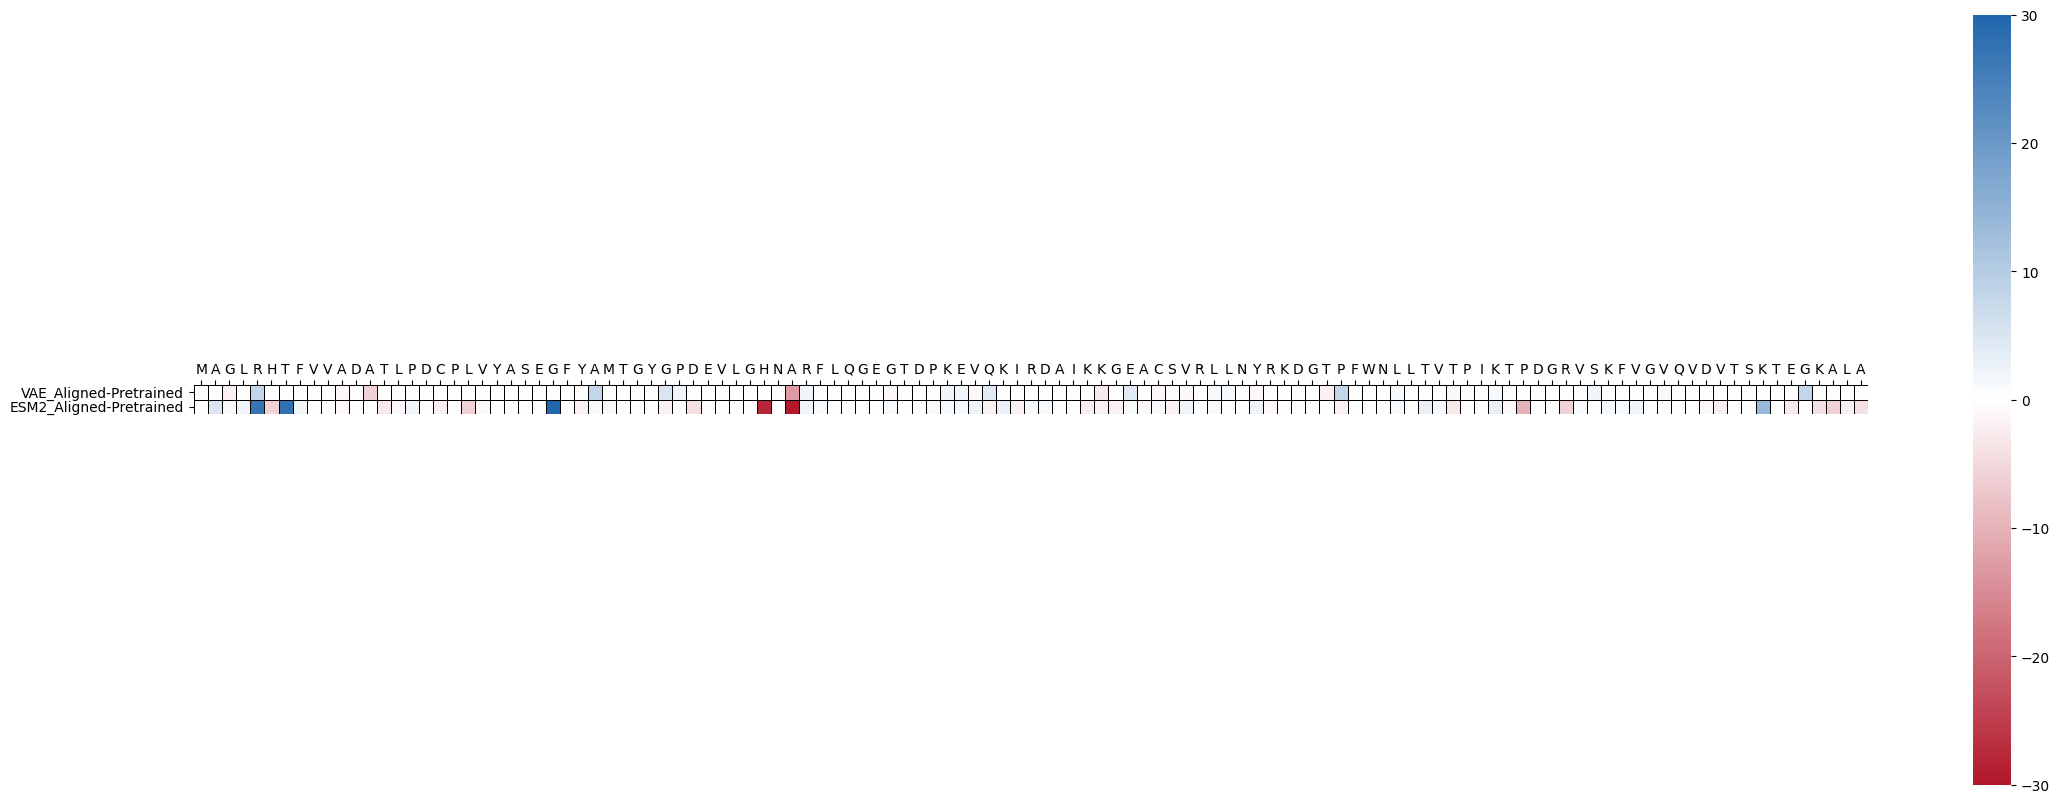

In [13]:
# Create a custom colormap, setting white as the center
colors = [(0, '#B2182B'), (0.5, 'white'), (1, '#2166AC')]
cmap_name = 'custom'
custom_cmap_1 = LinearSegmentedColormap.from_list(cmap_name, colors)

# Find min and max scores to properly set the colormap range
min_score_1 = np.min(mutation_difference_df)
max_score_1 = np.max(mutation_difference_df)

# Calculate the position of 0 in the colormap
midpoint = abs(min_score_1) / (max_score_1 - min_score_1)

# Create figure
fig, ax = plt.subplots(figsize=(27, 10))

# Plot the heatmap
sns.heatmap(mutation_difference_df.T, cmap=custom_cmap_1, vmin=min_score_1, vmax=max_score_1, square=True, cbar=True, 
            yticklabels=mutation_difference_df.T.index, ax=ax, linewidths=0.5, linecolor='black')

# Set the x-axis labels (representing base_sequence)
ax.set_xticks(np.arange(mutation_df.shape[1]) + 0.5)
ax.set_xticklabels(list(base_sequence))
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis='x', labeltop=True, labelbottom=False)

plt.savefig('./figures/Mutational_Freq_All_Models.svg')
plt.savefig('./figures/Mutational_Freq_All_Models.png')


In [14]:
# Function to convert counts to probabilities
def counts_to_probabilities(arr: np.ndarray):
    aa_dict = {aa:0 for aa in 'ACDEFGHIKLMNPQRSTVWY'}
    aas, counts = np.unique(arr, return_counts=True)
    counts = counts / counts.sum()
    aa_dict.update({aa:count for aa, count in zip(aas, counts)})
    return np.array(list(aa_dict.values()))

# Function to calculate sequence entropy
def sequence_entropy(seq_list, axis=1):
    seq_arr = np.vstack([np.array(list(s)) for s in seq_list])
    probabilities = np.vstack([counts_to_probabilities(i).T for i in seq_arr.T])
    return scipy.stats.entropy(probabilities, qk=None, base=None, axis=axis)


In [15]:
# # Load the dataset
designs_df = df

# List of models
models = designs_df['Model'].unique()

# Dictionary to store entropies for each model
entropy_dict = {}

# Calculate entropies for each model and store in the dictionary
for model in models:
    # Filter sequences by model
    seq_list = designs_df[designs_df['Model'] == model]['AA_sequence'].tolist()
    
    # Calculate entropies for the list of sequences
    entropies = sequence_entropy(seq_list)
    
    # Store entropies in the dictionary with the model name as the key
    entropy_dict[model] = entropies

# Convert the dictionary to a DataFrame
entropy_df = pd.DataFrame(entropy_dict, index=[f"Position_{i}" for i in range(len(entropies))]).T

# Display the DataFrame
print(entropy_df)

                 Position_0  Position_1  Position_2  Position_3  Position_4  \
Aligned_ESM2            0.0    0.590515    0.000000     0.24493    0.000000   
Pretrained_ESM2         0.0    0.146145    0.146145     0.00000    0.388734   
Aligned VAE             0.0    0.000000    0.000000     0.00000    0.366925   
Pre-trained VAE         0.0    0.000000    0.325083     0.00000    1.088900   

                 Position_5  Position_6  Position_7  Position_8  Position_9  \
Aligned_ESM2       0.146145     0.00000     0.29114         0.0    0.146145   
Pretrained_ESM2    0.638967     0.29114     0.00000         0.0    0.146145   
Aligned VAE        0.000000     0.00000     0.00000         0.0    0.000000   
Pre-trained VAE    0.000000     0.00000     0.00000         0.0    0.000000   

                 ...  Position_109  Position_110  Position_111  Position_112  \
Aligned_ESM2     ...           0.0           0.0      0.636514       0.29114   
Pretrained_ESM2  ...           0.0           0.0

In [16]:
# Create a new DataFrame by subtracting Pre-trained from Aligned for each model
entropy_difference_df = pd.DataFrame()

# Create new row that is row 0 - row 1 of mutation_df for mutational frequency difference between aligned and pre-trained VAE
entropy_difference_df['VAE_Aligned-Pretrained'] = entropy_df.iloc[2] - entropy_df.iloc[3]

# Create new row that is row 2 - row 3 of mutation_df for mutational frequency difference between aligned and pre-trained ESM2
entropy_difference_df['ESM2_Aligned-Pretrained'] = entropy_df.iloc[0] - entropy_df.iloc[1]

# Display the resulting DataFrame
print(entropy_difference_df.T)

                         Position_0  Position_1  Position_2  Position_3  \
VAE_Aligned-Pretrained          0.0     0.00000   -0.325083     0.00000   
ESM2_Aligned-Pretrained         0.0     0.44437   -0.146145     0.24493   

                         Position_4  Position_5  Position_6  Position_7  \
VAE_Aligned-Pretrained    -0.721975    0.000000     0.00000     0.00000   
ESM2_Aligned-Pretrained   -0.388734   -0.492822    -0.29114     0.29114   

                         Position_8  Position_9  ...  Position_109  \
VAE_Aligned-Pretrained          0.0         0.0  ...           0.0   
ESM2_Aligned-Pretrained         0.0         0.0  ...           0.0   

                         Position_110  Position_111  Position_112  \
VAE_Aligned-Pretrained            0.0       0.00000       0.00000   
ESM2_Aligned-Pretrained           0.0      -0.17603       0.04621   

                         Position_113  Position_114  Position_115  \
VAE_Aligned-Pretrained         0.0000      0.702209      0.0

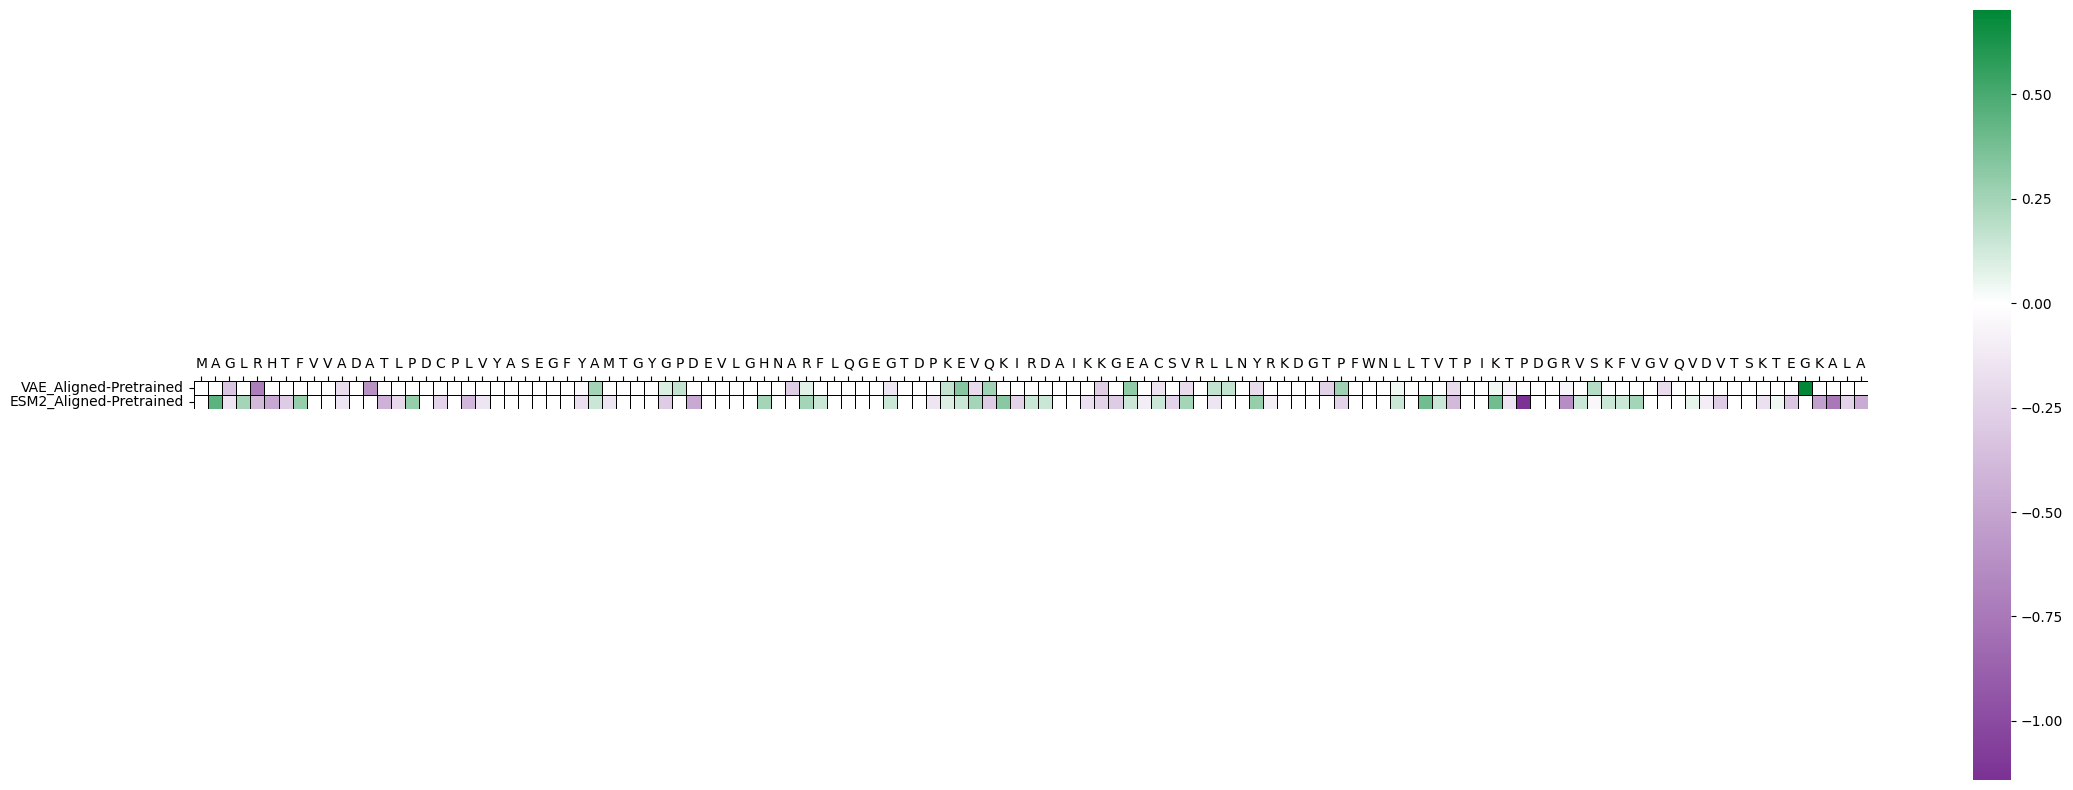

In [19]:
# Find min and max scores to properly set the colormap range
min_score_2 = np.min(entropy_difference_df)
max_score_2 = np.max(entropy_difference_df)

# Calculate the position of 0 in the colormap
midpoint = abs(min_score_2) / (max_score_2 - min_score_2)

# Create a custom colormap where white is centered at 0
colors = [(0, '#7b3294'), (midpoint, 'white'), (1, '#008837')]
custom_cmap_2 = LinearSegmentedColormap.from_list(cmap_name, colors)

# Create figure
fig, ax = plt.subplots(figsize=(27, 10))

# Plot the heatmap
sns.heatmap(entropy_difference_df.T, cmap=custom_cmap_2, vmin=min_score_2, vmax=max_score_2, square=True, cbar=True, 
            yticklabels=entropy_difference_df.T.index, ax=ax, linewidths=0.5, linecolor='black')

# Set the x-axis labels (representing base_sequence)
ax.set_xticks(np.arange(mutation_df.shape[1]) + 0.5)
ax.set_xticklabels(list(base_sequence))
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis='x', labeltop=True, labelbottom=False)

plt.savefig('./figures/Shannon_Entropy_All_Models.svg')
plt.savefig('./figures/Shannon_Entropy_All_Models.png')

In [20]:
#Create a PyMol Script to color CreiLOV AF3 structure by mutational frequency

# # Load sequences from pre-trained, sft, and aligned ESM2
# version = 12
# dir_filepath = f'../RLXF_PPO_from_pretrained_ESM2_GPU/logs/Aligning_SFT_ESM2s_wpPPO/version_{version}'

# df_esm2_fixed = pd.read_csv(f"{dir_filepath}/esm2_t33_650M_UR50D_fixed_mutated_designs_scores.csv")
# df_esm2_sft = pd.read_csv(f"{dir_filepath}/esm2_t33_650M_UR50D_sft_mutated_designs_scores.csv")
# df_esm2_rl = pd.read_csv(f"{dir_filepath}/ema_aligned_esm2_t33_650M_UR50D_mutated_designs_scores_ep1.csv")
# df_esm2_fixed["Model"] = "ESM2_fixed"
# df_esm2_sft["Model"] = "ESM2_sft"
# df_esm2_rl["Model"] = "ESM2_rl"

# # Load sequences from pre-trained and aligned VAE
# version = 507
# dir_filepath = f'../RLXF_Projects/designs/vae_designs/version_{version}'

# df_vae_fixed = pd.read_csv(f"{dir_filepath}/fixed_vae_designs_scores_507.csv")
# df_vae_rl = pd.read_csv(f"{dir_filepath}/rl_vae_designs_scores_507.csv")
# df_vae_fixed["Model"] = "VAE_fixed"
# df_vae_rl["Model"] = "VAE_rl"

# # Combine all dataframes into a single dataframe
# df = pd.concat([df_esm2_fixed, df_esm2_sft, df_esm2_rl, df_vae_fixed, df_vae_rl], ignore_index=True)
# print(len(df_combined))
# df.head()


In [21]:
# # Initialize a dictionary to store mutation counts for each model
# mutation_counts = {model: np.zeros(sequence_length) for model in df['Model'].unique()}

# # Count mutations for each model
# for _, row in df.iterrows():
#     model = row['Model']
#     seq = row['Sequence']
#     for i in range(sequence_length):
#         if seq[i] != base_sequence[i]:
#             mutation_counts[model][i] += 1

# # Create a dataframe for the heatmap
# mutation_df = pd.DataFrame(mutation_counts).T

mutation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
Aligned_ESM2,0.0,6.0,0.0,2.0,30.0,1.0,30.0,2.0,0.0,1.0,...,0.0,0.0,20.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0
Pretrained_ESM2,0.0,1.0,1.0,0.0,3.0,7.0,2.0,0.0,0.0,1.0,...,0.0,0.0,6.0,2.0,5.0,1.0,5.0,6.0,3.0,4.0
Aligned VAE,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
Pre-trained VAE,0.0,0.0,2.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
# Provided mutation frequency data
mutation_data = {
    'Aligned_VAE': mutation_df.iloc[2],
    'Pre_trained_VAE': mutation_df.iloc[3],
    'Aligned_ESM2': mutation_df.iloc[0],
    'Pre_trained_ESM2': mutation_df.iloc[1]}

mutation_data

{'Aligned_VAE': 0       0.0
 1       0.0
 2       0.0
 3       0.0
 4      22.0
        ... 
 114     9.0
 115     0.0
 116     0.0
 117     0.0
 118     0.0
 Name: Aligned VAE, Length: 119, dtype: float64,
 'Pre_trained_VAE': 0       0.0
 1       0.0
 2       2.0
 3       0.0
 4      14.0
        ... 
 114     1.0
 115     0.0
 116     0.0
 117     0.0
 118     0.0
 Name: Pre-trained VAE, Length: 119, dtype: float64,
 'Aligned_ESM2': 0       0.0
 1       6.0
 2       0.0
 3       2.0
 4      30.0
        ... 
 114     1.0
 115     1.0
 116     0.0
 117     1.0
 118     0.0
 Name: Aligned_ESM2, Length: 119, dtype: float64,
 'Pre_trained_ESM2': 0      0.0
 1      1.0
 2      1.0
 3      0.0
 4      3.0
       ... 
 114    1.0
 115    5.0
 116    6.0
 117    3.0
 118    4.0
 Name: Pretrained_ESM2, Length: 119, dtype: float64}

In [23]:
def hex_to_rgb(hex_str):
    """Convert a hex color string to a list of normalized RGB values."""
    hex_str = hex_str.lstrip('#')
    # Slightly reduce the intensity of the red to avoid high intensity reflections
    if hex_str.upper() == 'EF3B2C':
        return [int(hex_str[i:i+2], 16) * 0.85 / 255.0 for i in (0, 2, 4)]
    return [int(hex_str[i:i+2], 16) / 255.0 for i in (0, 2, 4)]


def create_color_scale_svg(color_map, filename):
    """Create an SVG file showing a linear color scale."""
    fig, ax = plt.subplots(figsize=(6, 1))
    cb = fig.colorbar(plt.cm.ScalarMappable(cmap=color_map), cax=ax, orientation='horizontal')
    cb.set_label('Mutation Frequency')
    plt.savefig(filename, format='svg')
    plt.close()

# Define colors as normalized RGB lists
base_grey = hex_to_rgb('#f0f0f0')  # Base color for no mutation
target_red = hex_to_rgb('#ef3b2c')  # Adjusted target red for high mutation
fad_blue = hex_to_rgb('#f0f0f0')   # Same as base color for no mutation

# Normalize the mutation frequencies for each model
normalized_data = {model: mutations / np.max(mutations) for model, mutations in mutation_data.items()}
print(normalized_data)

# Generate separate PyMOL scripts for each model
for model, normalized_mutations in normalized_data.items():
    pymol_script = "load CreiLOV_AF3.pdb, CreiLOV_AF3\n"

    # Color each residue by interpolating from base_grey (low mutation) to target_red (high mutation)
    for i, freq in enumerate(normalized_mutations):
        # Use a non-linear interpolation to enhance red visibility at lower frequencies
        scaled_freq = 1 - (1 - freq) ** (2)  # scaling
        
        interp_color = [
            base + (target - base) * scaled_freq
            for base, target in zip(base_grey, target_red)
        ]
        pymol_script += (
            f"set_color color_CreiLOV_AF3_{i}, "
            f"[{interp_color[0]:.3f}, {interp_color[1]:.3f}, {interp_color[2]:.3f}]\n"
        )
        pymol_script += f"color color_CreiLOV_AF3_{i}, /CreiLOV_AF3//A/{i+1}\n"

    # Color FAD in the structure using the blue color
    pymol_script += (
        f"set_color fad_color, [{fad_blue[0]:.3f}, {fad_blue[1]:.3f}, {fad_blue[2]:.3f}]\n"
    )
    pymol_script += "color fad_color, resn FAD\n"

    pymol_script += 'set_view (\
    -0.714749336,    0.369134575,    0.594031334,\
     0.672263265,    0.596839964,    0.437998772,\
    -0.192860603,    0.712407291,   -0.674746692,\
     0.000000000,    0.000000000, -141.771377563,\
    -0.139339447,    0.397043228,   -0.273117065,\
   111.773635864,  171.769119263,  -20.000000000 )\n'

    # Rendering settings
    pymol_script += "set ray_opaque_background, off\n"
    pymol_script += "set specular, 0\n"  # Disable specular reflections to avoid cyan highlights
    pymol_script += "set ray_trace_fog, 0\n"  # Disable ray trace fog
    pymol_script += "ray\n"
    pymol_script += f"png ray_color_creilov_{model}.png, dpi=300\n"

    # Save color scale as SVG
    color_map = LinearSegmentedColormap.from_list("mutation_scale", [base_grey, target_red])
    create_color_scale_svg(color_map, f"figures/color_scale_{model}.svg")

    script_filename = f"figures/color_creilov_{model}.pml"
    with open(script_filename, "w") as file:
        file.write(pymol_script)

    print(f"PyMOL script saved as '{script_filename}'.")

{'Aligned_VAE': 0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      1.000000
         ...   
114    0.409091
115    0.000000
116    0.000000
117    0.000000
118    0.000000
Name: Aligned VAE, Length: 119, dtype: float64, 'Pre_trained_VAE': 0      0.000000
1      0.000000
2      0.133333
3      0.000000
4      0.933333
         ...   
114    0.066667
115    0.000000
116    0.000000
117    0.000000
118    0.000000
Name: Pre-trained VAE, Length: 119, dtype: float64, 'Aligned_ESM2': 0      0.000000
1      0.200000
2      0.000000
3      0.066667
4      1.000000
         ...   
114    0.033333
115    0.033333
116    0.000000
117    0.033333
118    0.000000
Name: Aligned_ESM2, Length: 119, dtype: float64, 'Pre_trained_ESM2': 0      0.000000
1      0.033333
2      0.033333
3      0.000000
4      0.100000
         ...   
114    0.033333
115    0.166667
116    0.200000
117    0.100000
118    0.133333
Name: Pretrained_ESM2, Length: 119, dtype: float64}
PyMOL script saved as 'f